$\text{Deutsch-Jozsa Algorithm}$

In [36]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere, array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from  math import pi, sqrt
from qiskit.circuit.library import Initialize
from qiskit.circuit.library import IGate

mpl = 'mpl'

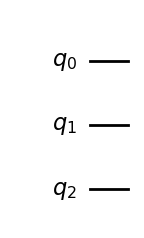

In [37]:
#Constant Oracle
n = 2
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
const_oracle.draw(mpl)

/opt/miniconda3/envs/Qiskit/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /opt/miniconda3/envs/Qiskit/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


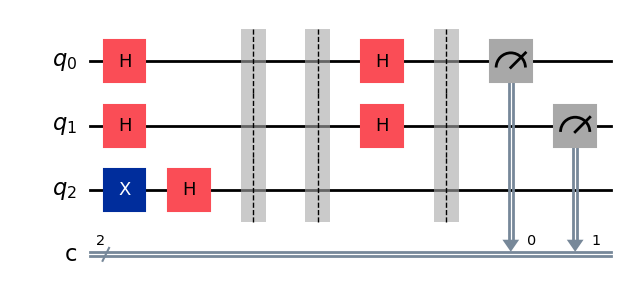

In [38]:
#DJ circuit

dj_ciruit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_ciruit.h(qubit)

dj_ciruit.x(n)
dj_ciruit.h(n)
dj_ciruit.barrier()

dj_ciruit.compose(const_oracle, inplace=True)
dj_ciruit.barrier()

for qubit in range(n):
    dj_ciruit.h(qubit)
dj_ciruit.barrier()

for i in range(n):
    dj_ciruit.measure(i,i)

dj_ciruit.draw(mpl, style='iqx')

the total counts are:  {'00': 1000}


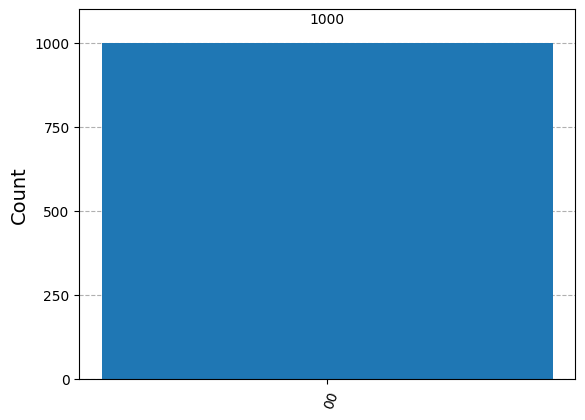

In [39]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(dj_ciruit, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(circ)

print("the total counts are: ", counts)

plot_histogram(counts)

In [40]:
#General Function for Constant Oracle

def dj_oracle_const(n):
    oracle_qc = QuantumCircuit(n+1)
    output = np.random.randint(2)
    if output == 1: 
        oracle_qc.x(n)
    oracle_gate_const = oracle_qc.to_gate()
    oracle_gate_const.name = 'Oracle Constant'
    return oracle_gate_const


In [41]:
# DJ Algorithm Function

def dj_algorithm(dj_oracle_function, n):
    dj_ciruit = QuantumCircuit(n+1, n)
    dj_ciruit.x(n)
    dj_ciruit.h(n)

    for qubit in range(n):
        dj_ciruit.h(qubit)
    dj_ciruit.append(dj_oracle_function, range(n+1))

    for qubit in range(n):
        dj_ciruit.h(qubit)
    
    for i in range(n):
        dj_ciruit.measure(i,i)
    return dj_ciruit

    

/opt/miniconda3/envs/Qiskit/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /opt/miniconda3/envs/Qiskit/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


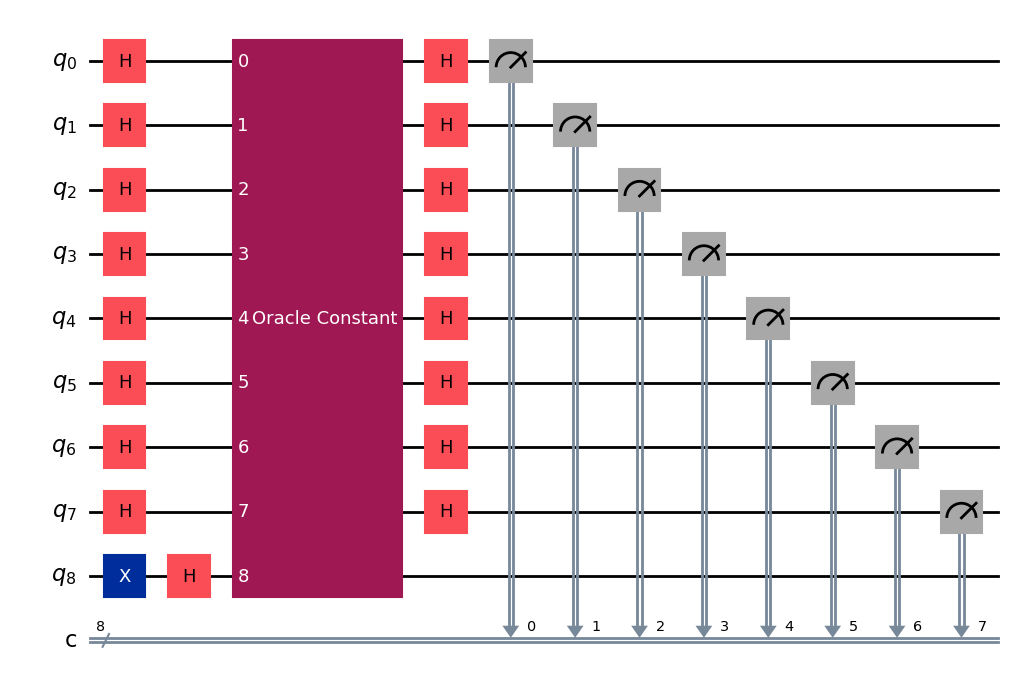

In [42]:
n = 8 #8 qubits

dj_oracle_const = dj_oracle_const(n)
dj_ciruit = dj_algorithm(dj_oracle_const, n)
dj_ciruit.draw(mpl, style='iqx')